<a href="https://colab.research.google.com/github/ashikur-rahman-asif/Animated-smart-watch/blob/main/bias_fairness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

In [9]:
from google.colab import drive
drive.mount('/content/drive')

# --- Code to load CSV from Google Drive --- #
# IMPORTANT: Replace 'path/to/your/file_in_drive.csv' with the actual path to your CSV file in Google Drive
# Example: '/content/drive/MyDrive/my_data_folder/my_loan_data.csv'
csv_file_in_drive_path = '/content/drive/MyDrive/path/to/your/file_in_drive.csv'

try:
    df_drive = pd.read_csv(csv_file_in_drive_path)
    print(f"Successfully loaded CSV from Drive: {csv_file_in_drive_path}")
    display(df_drive.head())
except FileNotFoundError:
    print(f"Error: The file '{csv_file_in_drive_path}' was not found. Please check the path.")
except Exception as e:
    print(f"An error occurred while loading the CSV: {e}")

Mounted at /content/drive


In [ ]:
# Install gdown for downloading files from Google Drive via public links
!pip install gdown

In [10]:
# File ID extracted from the provided Google Drive link
drive_file_id = '1zCUQm732LHmTyuD2Y6MnDWczsVPITSdI'
file_name = 'loan_data.csv' # Assuming a generic name, you can change this if you know the actual file name

# Download the file using gdown
!gdown --id "{drive_file_id}" -O "{file_name}"

print(f"File '{file_name}' downloaded successfully.")

try:
    # Load the downloaded CSV file into a pandas DataFrame and assign it directly to 'df'
    df = pd.read_csv(file_name)
    print("Successfully loaded data into df.")
    display(df.head())
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}")

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zCUQm732LHmTyuD2Y6MnDWczsVPITSdI
To: /content/loan_data.csv
100% 40.8k/40.8k [00:00<00:00, 68.6MB/s]
File 'loan_data.csv' downloaded successfully.
Successfully loaded data into df_loan_data.


,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [13]:
# The variable 'df' is currently a string. The actual DataFrame is in 'df_loan_data'.
# This often happens if the cell that loads 'df' was modified but not re-executed.
# To fix this within this cell, we'll assign the DataFrame to 'df'.
df = df_loan_data

df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [14]:
df.isnull().sum()

,0
Unnamed: 0,0
Loan_ID,0
Gender,9
Married,3
Dependents,12
Education,0
Self_Employed,27
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,18


In [15]:
df["Loan_Status"].value_counts()

,count
Loan_Status,
Y,345
N,155


In [16]:
df["Gender"].value_counts()

,count
Gender,
Male,400
Female,91


In [17]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Total_Income'] = df['Total_Income'].replace('[\$,]', '', regex=True).astype(float)

In [18]:
df.isnull().sum()

,0
Unnamed: 0,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0


In [19]:
print(df.groupby('Gender')['Loan_Status'].value_counts(normalize=True))
print(df.groupby('Married')['Loan_Status'].value_counts(normalize=True))
print(df.groupby('Education')['Loan_Status'].value_counts(normalize=True))
print(df.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True))
print(df.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True))

Gender  Loan_Status
Female  Y              0.659341
        N              0.340659
Male    Y              0.696822
        N              0.303178
Name: proportion, dtype: float64
Married  Loan_Status
No       Y              0.640000
         N              0.360000
Yes      Y              0.716923
         N              0.283077
Name: proportion, dtype: float64
Education     Loan_Status
Graduate      Y              0.712468
              N              0.287532
Not Graduate  Y              0.607477
              N              0.392523
Name: proportion, dtype: float64
Self_Employed  Loan_Status
No             Y              0.691244
               N              0.308756
Yes            Y              0.681818
               N              0.318182
Name: proportion, dtype: float64
Property_Area  Loan_Status
Rural          Y              0.602837
               N              0.397163
Semiurban      Y              0.792553
               N              0.207447
Urban          Y       

In [20]:
from scipy.stats import chi2_contingency

categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Loan_Status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{feature} vs Loan_Status: p-value = {p}")
    if p < 0.05:
        print(f"=> Significant association found for {feature}")
    else:
        print(f"=> No significant association for {feature}")
    print('-----------------------------')

Gender vs Loan_Status: p-value = 0.566038587553215
=> No significant association for Gender
-----------------------------
Married vs Loan_Status: p-value = 0.09442066362490836
=> No significant association for Married
-----------------------------
Education vs Loan_Status: p-value = 0.049532733134980515
=> Significant association found for Education
-----------------------------
Self_Employed vs Loan_Status: p-value = 0.9908829700973135
=> No significant association for Self_Employed
-----------------------------
Property_Area vs Loan_Status: p-value = 0.0004122791578005969
=> Significant association found for Property_Area
-----------------------------


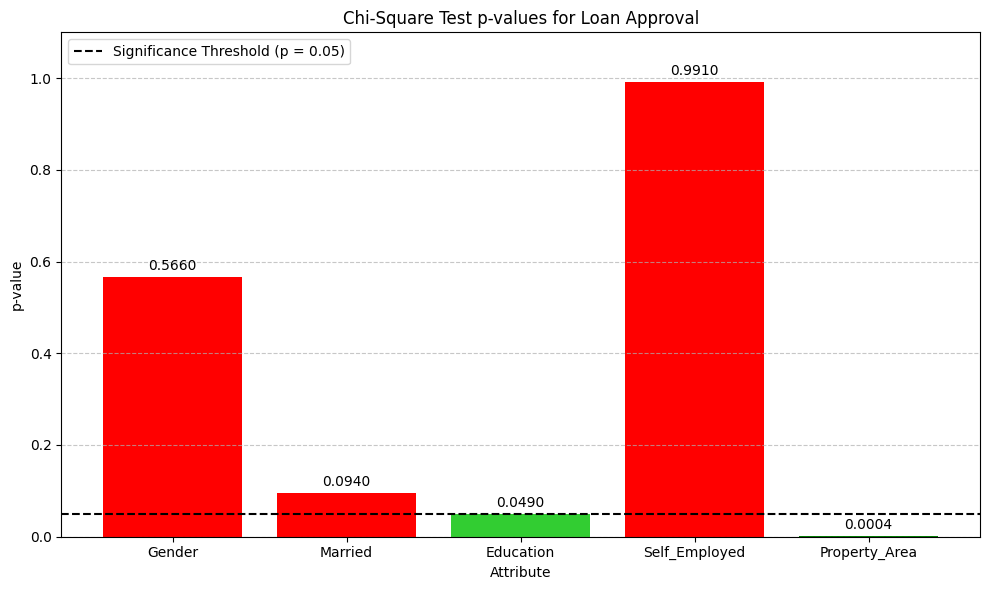

In [21]:
attributes = ["Gender", "Married", "Education", "Self_Employed", "Property_Area"]
p_values = [0.566, 0.094, 0.049, 0.991, 0.0004]
colors = []
for p in p_values:
    if p < 0.01:
        colors.append("green")         # Highly significant
    elif p < 0.05:
        colors.append("limegreen")     # Significant
    else:
        colors.append("red")           # Not significant

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(attributes, p_values, color=colors)

# Draw a line at p = 0.05 for significance threshold
plt.axhline(0.05, color='black', linestyle='--', label="Significance Threshold (p = 0.05)")

# Annotate each bar with its p-value
for bar, value in zip(bars, p_values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.01, f"{value:.4f}",
             ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title("Chi-Square Test p-values for Loan Approval")
plt.ylabel("p-value")
plt.xlabel("Attribute")
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [22]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})

In [23]:
drop_cols = ['Unnamed: 0', 'Loan_ID',]
df = df.drop(columns=drop_cols)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,1,0,5849,0.0,126.5,360.0,1.0,2,1,5849.0
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


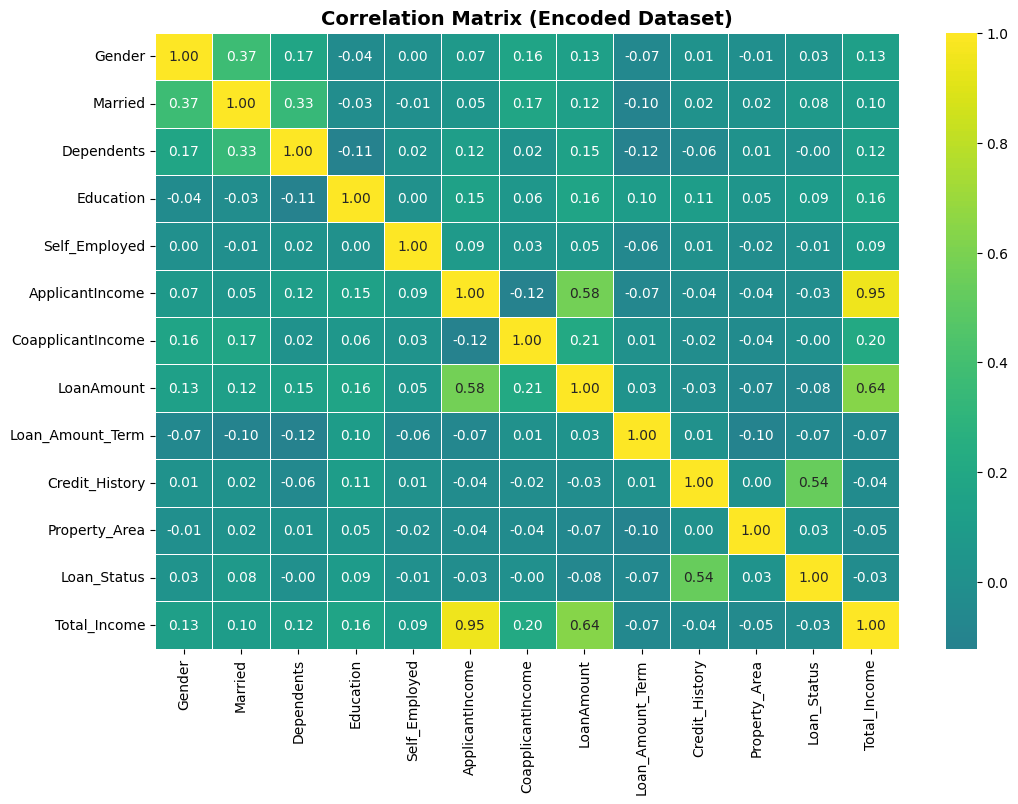

In [24]:
# Correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Encoded Dataset)", fontsize=14, fontweight="bold")
plt.show()

In [25]:
# -----------------------------------------------
# Fairness Metrics Before Train)
# -----------------------------------------------

def demographic_parity(df: pd.DataFrame, sensitive_attr: str, label: str = 'Loan_Status') -> pd.Series:
    """
    Demographic Parity: Group-wise positive outcome rate.
    """
    return df.groupby(sensitive_attr)[label].mean()


def disparate_impact(df: pd.DataFrame, sensitive_attr: str, label: str = 'Loan_Status') -> float:
    """
    Disparate Impact: approval rate ratio (min_group / max_group)
    """
    rates = demographic_parity(df, sensitive_attr, label)
    min_group = rates.idxmin()
    max_group = rates.idxmax()
    return rates[min_group] / rates[max_group] if rates[max_group] != 0 else np.nan


def statistical_parity_difference(df: pd.DataFrame, sensitive_attr: str, label: str = 'Loan_Status') -> float:
    """
    Statistical Parity Difference (SPD):
    difference between unprivileged and privileged group's positive rates.
    """
    rates = demographic_parity(df, sensitive_attr, label)
    min_group = rates.idxmin()
    max_group = rates.idxmax()
    return rates[min_group] - rates[max_group]


def print_fairness_metrics(df: pd.DataFrame, sensitive_attr_list: list, label: str = 'Loan_Status') -> None:
    """
    Prints all fairness metrics (DP, DI, SPD) in a clean readable format.
    """
    print("=== Fairness Metrics Summary ===\n")
    for attr in sensitive_attr_list:
        print(f"=== Sensitive Attribute: {attr} ===")
        dp = demographic_parity(df, attr, label)
        di = disparate_impact(df, attr, label)
        spd = statistical_parity_difference(df, attr, label)
        print("Demographic Parity (Approval Rate):")
        print(dp)
        print(f"Disparate Impact: {di:.3f}")
        print(f"Statistical Parity Difference (SPD): {spd:.3f}\n")



sensitive_attributes = ['Gender', 'Married', 'Education', 'Property_Area']
print_fairness_metrics(df, sensitive_attributes)

=== Fairness Metrics Summary ===

=== Sensitive Attribute: Gender ===
Demographic Parity (Approval Rate):
Gender
0    0.659341
1    0.696822
Name: Loan_Status, dtype: float64
Disparate Impact: 0.946
Statistical Parity Difference (SPD): -0.037

=== Sensitive Attribute: Married ===
Demographic Parity (Approval Rate):
Married
0    0.640000
1    0.716923
Name: Loan_Status, dtype: float64
Disparate Impact: 0.893
Statistical Parity Difference (SPD): -0.077

=== Sensitive Attribute: Education ===
Demographic Parity (Approval Rate):
Education
0    0.607477
1    0.712468
Name: Loan_Status, dtype: float64
Disparate Impact: 0.853
Statistical Parity Difference (SPD): -0.105

=== Sensitive Attribute: Property_Area ===
Demographic Parity (Approval Rate):
Property_Area
0    0.602837
1    0.792553
2    0.649123
Name: Loan_Status, dtype: float64
Disparate Impact: 0.761
Statistical Parity Difference (SPD): -0.190



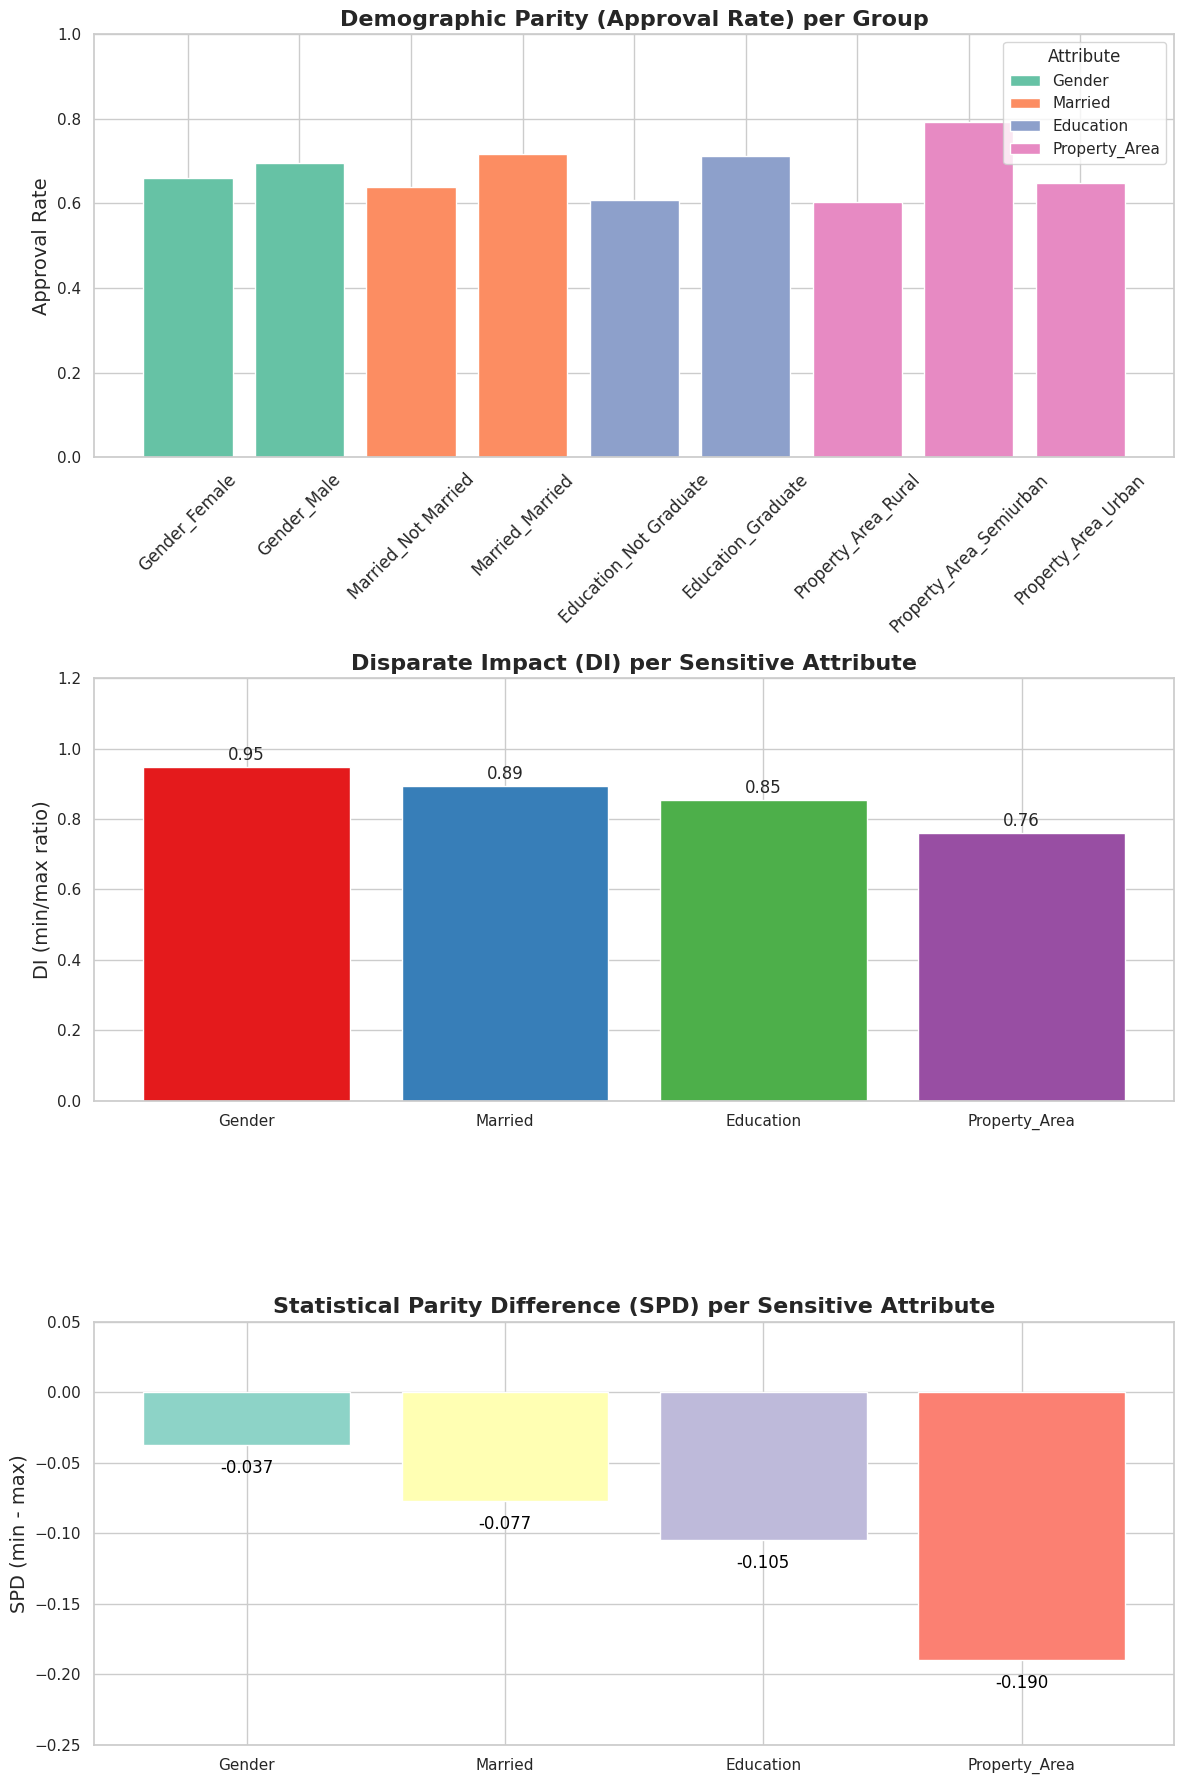

In [26]:
sns.set(style="whitegrid")  # Modern clean background

sensitive_attributes = ['Gender', 'Married', 'Education', 'Property_Area']

# Label mapping for clarity
label_mapping = {
    'Gender': {0: 'Female', 1: 'Male'},
    'Married': {0: 'Not Married', 1: 'Married'},
    'Education': {0: 'Not Graduate', 1: 'Graduate'},
    'Property_Area': {0: 'Rural', 1: 'Semiurban', 2: 'Urban'}
}

# Prepare data
dp_data = {}
di_data = {}
spd_data = {}
dp_labels = {}

for attr in sensitive_attributes:
    dp = df.groupby(attr)['Loan_Status'].mean()
    di = dp.min() / dp.max() if dp.max() != 0 else float('nan')
    spd = dp.min() - dp.max()

    dp_data[attr] = dp.values
    dp_labels[attr] = [label_mapping[attr][val] for val in dp.index]
    di_data[attr] = di
    spd_data[attr] = spd

# --- Plotting with modern colors ---
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Color palette
colors_dp = sns.color_palette("Set2", 10)
colors_di = sns.color_palette("Set1", len(di_data))
colors_spd = sns.color_palette("Set3", len(spd_data))

# 1️⃣ Demographic Parity (Approval Rate)
for i, attr in enumerate(sensitive_attributes):
    axs[0].bar([f"{attr}_{label}" for label in dp_labels[attr]], dp_data[attr], label=attr, color=colors_dp[i])
axs[0].set_title("Demographic Parity (Approval Rate) per Group", fontsize=16, weight='bold')
axs[0].set_ylabel("Approval Rate", fontsize=14)
axs[0].legend(title="Attribute")
axs[0].tick_params(axis='x', rotation=45, labelsize=12)
axs[0].set_ylim(0, 1)

# 2️⃣ Disparate Impact (DI)
axs[1].bar(di_data.keys(), di_data.values(), color=colors_di)
axs[1].set_title("Disparate Impact (DI) per Sensitive Attribute", fontsize=16, weight='bold')
axs[1].set_ylabel("DI (min/max ratio)", fontsize=14)
axs[1].set_ylim(0, 1.2)
for i, v in enumerate(di_data.values()):
    axs[1].text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

# 3️⃣ Statistical Parity Difference (SPD)
axs[2].bar(spd_data.keys(), spd_data.values(), color=colors_spd)
axs[2].set_title("Statistical Parity Difference (SPD) per Sensitive Attribute", fontsize=16, weight='bold')
axs[2].set_ylabel("SPD (min - max)", fontsize=14)
axs[2].set_ylim(-0.25, 0.05)
for i, v in enumerate(spd_data.values()):
    axs[2].text(i, v - 0.02, f"{v:.3f}", ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, recall_score, f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTEENN
import numpy as np
import pandas as pd

# === 1️⃣ Features & Target ===
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']
categorical_features = [col for col in X.columns if col not in numeric_features]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# === 2️⃣ Train-Test Split (70:30) ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Total samples: {len(df)}")
print(f"Train set: {len(X_train)} samples (Class 0: {(y_train==0).sum()}, Class 1: {(y_train==1).sum()})")
print(f"Test set: {len(X_test)} samples (Class 0: {(y_test==0).sum()}, Class 1: {(y_test==1).sum()})")

# === 3️⃣ Models & Hyperparameters ===
models_params = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42, class_weight='balanced'),
        "params": {'classifier__n_estimators':[50,100,200],'classifier__max_depth':[None,10,20],'classifier__min_samples_split':[2,5]}
    },
    "XGBoost": {
        "model": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "params": {'classifier__n_estimators':[50,100,200],'classifier__max_depth':[3,5,7],'classifier__learning_rate':[0.01,0.1,0.2]}
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
        "params": {'classifier__C':[0.01,0.1,1,10],'classifier__penalty':['l2'],'classifier__solver':['lbfgs']}
    },
    "SVM": {
        "model": SVC(probability=True, random_state=42, class_weight='balanced'),
        "params": {'classifier__C':[0.1,1,10],'classifier__kernel':['linear','rbf'],'classifier__gamma':['scale','auto']}
    }
}

# Scorer
weighted_f1_scorer = make_scorer(f1_score, average='weighted')

# === 4️⃣ Training Loop with CV & Test Evaluation ===
model_global_data = {}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, mp in models_params.items():
    print(f"\n=== Training & CV for {model_name} ===")

    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smoteenn', SMOTEENN(random_state=42)),
        ('classifier', mp['model'])
    ])

    grid_search = GridSearchCV(
        pipeline,
        param_grid=mp['params'],
        cv=skf,
        scoring=weighted_f1_scorer,
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # --- Manual class-wise CV metrics ---
    f1_per_class = []
    recall_per_class = []
    support_per_class = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        best_model.fit(X_tr, y_tr)
        y_val_pred = best_model.predict(X_val)

        f1_per_class.append(f1_score(y_val, y_val_pred, average=None))
        recall_per_class.append(recall_score(y_val, y_val_pred, average=None))
        support_per_class.append(np.bincount(y_val, minlength=2))

    f1_per_class = np.array(f1_per_class)
    recall_per_class = np.array(recall_per_class)
    support_per_class = np.array(support_per_class)

    print("=== CV Metrics per class (mean ± std) ===")
    for cls in [0,1]:
        print(f"Class {cls} | F1: {f1_per_class[:,cls].mean():.4f} ± {f1_per_class[:,cls].std():.4f} | "
              f"Recall: {recall_per_class[:,cls].mean():.4f} ± {recall_per_class[:,cls].std():.4f} | "
              f"Support: {support_per_class[:,cls].mean():.1f} ± {support_per_class[:,cls].std():.1f}")

    # --- Test prediction with threshold tuning ---
    y_prob_test = best_model.predict_proba(X_test)[:,1]
    thresholds = np.arange(0.1,0.9,0.01)
    best_thresh = 0.5
    best_score = 0
    for t in thresholds:
        y_pred_thresh = (y_prob_test>t).astype(int)
        score = recall_score(y_test, y_pred_thresh) + f1_score(y_test, y_pred_thresh)
        if score > best_score:
            best_score = score
            best_thresh = t

    y_test_pred = (y_prob_test>best_thresh).astype(int)

    # --- Test metrics ---
    print(f"\nBest hyperparameters: {grid_search.best_params_}")
    print(f"Train CV Weighted F1: {grid_search.best_score_:.4f}")
    print(f"Best Threshold (Test): {best_thresh:.2f}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Test ROC-AUC: {roc_auc_score(y_test, y_prob_test):.4f}")
    print(f"Test Recall (minority class): {recall_score(y_test, y_test_pred):.4f}")
    print(f"Test F1: {f1_score(y_test, y_test_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_test_pred, digits=4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

    # Save for further analysis
    model_global_data[model_name] = {
        'best_model': best_model,
        'cv_f1_per_class': f1_per_class,
        'cv_recall_per_class': recall_per_class,
        'cv_support_per_class': support_per_class,
        'test_y_pred': y_test_pred,
        'test_y_prob': y_prob_test,
        'best_threshold': best_thresh
    }

Total samples: 500
Train set: 350 samples (Class 0: 109, Class 1: 241)
Test set: 150 samples (Class 0: 46, Class 1: 104)

=== Training & CV for Random Forest ===
Fitting 5 folds for each of 18 candidates, totalling 90 fits
=== CV Metrics per class (mean ± std) ===
Class 0 | F1: 0.5404 ± 0.0804 | Recall: 0.5325 ± 0.0640 | Support: 21.8 ± 0.4
Class 1 | F1: 0.7880 ± 0.0700 | Recall: 0.7926 ± 0.1019 | Support: 48.2 ± 0.4

Best hyperparameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Train CV Weighted F1: 0.7108
Best Threshold (Test): 0.24
Test Accuracy: 0.8667
Test ROC-AUC: 0.7872
Test Recall (minority class): 0.9808
Test F1: 0.9107
Classification Report:
               precision    recall  f1-score   support

           0     0.9333    0.6087    0.7368        46
           1     0.8500    0.9808    0.9107       104

    accuracy                         0.8667       150
   macro avg     0.8917    0.7947    0.8238       150
weight


🔍 SHAP Explainability for Random Forest


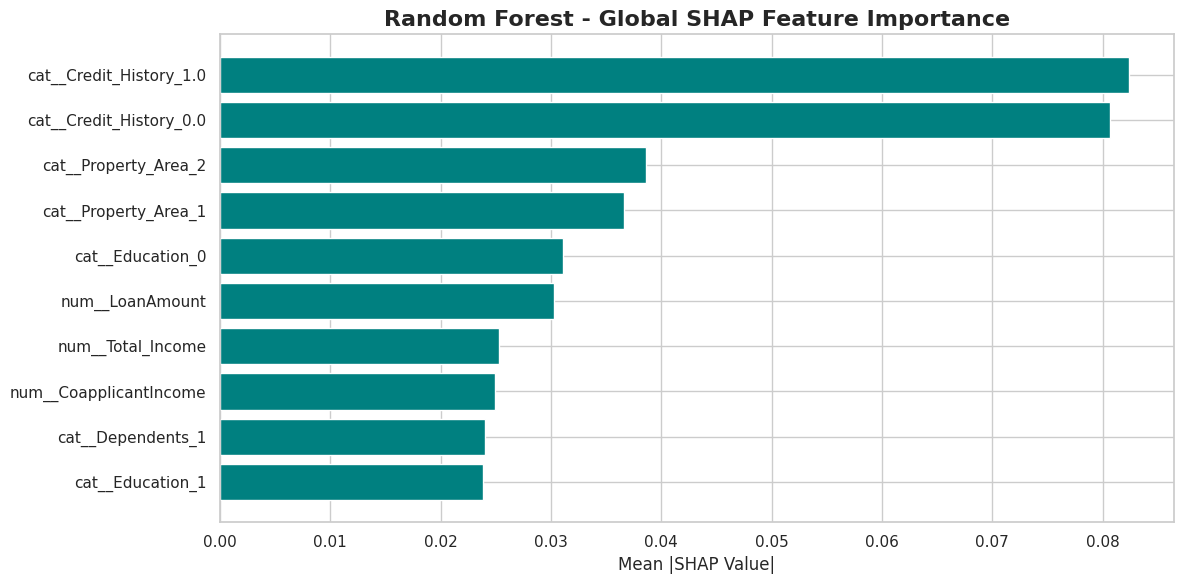

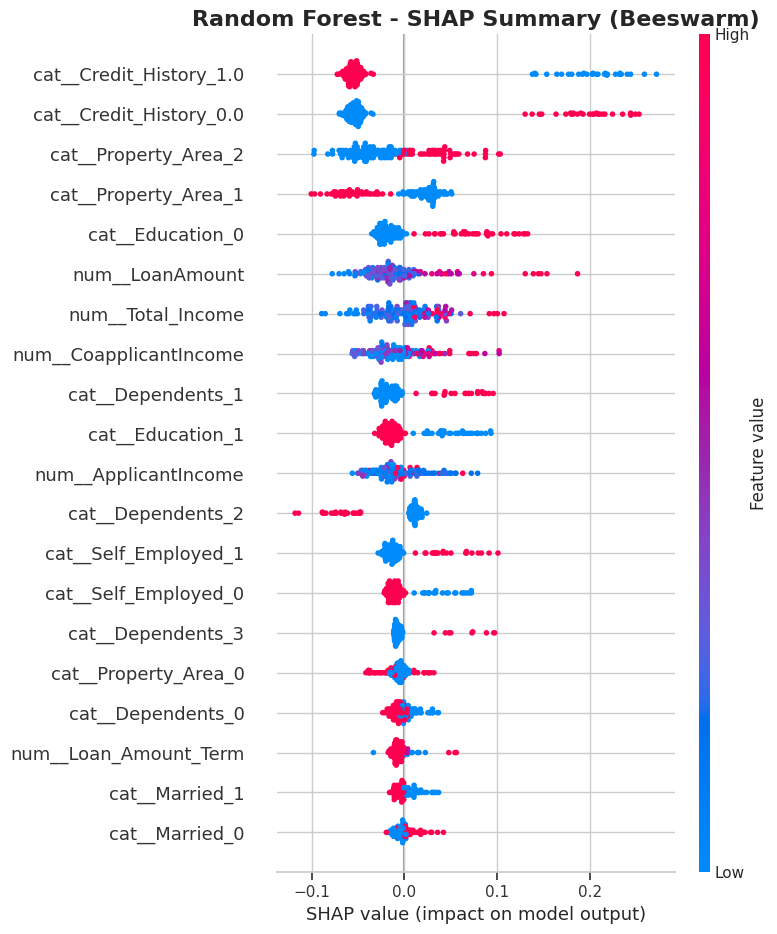

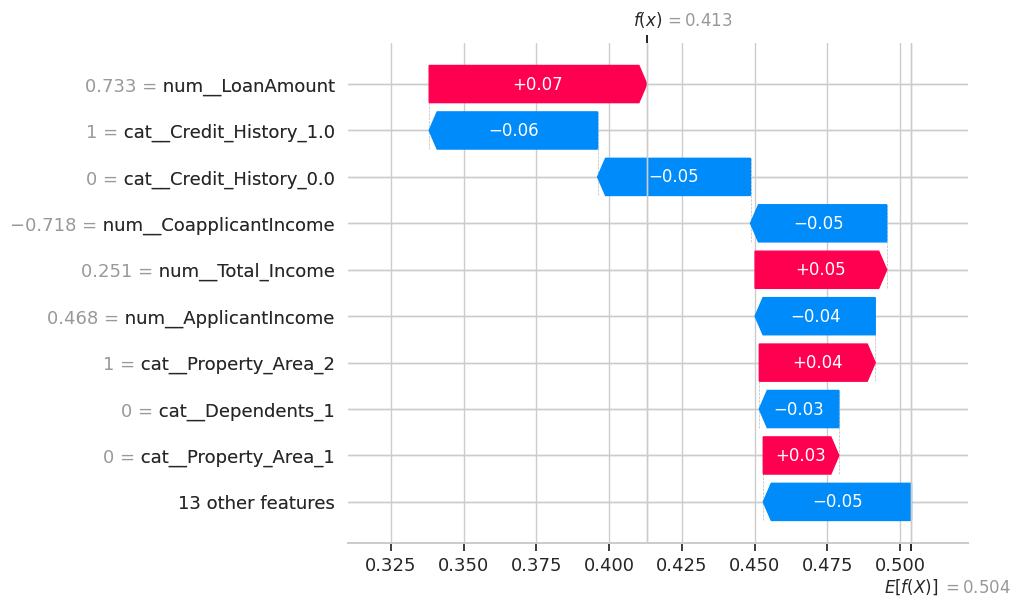

<Figure size 640x480 with 0 Axes>


🔍 SHAP Explainability for XGBoost


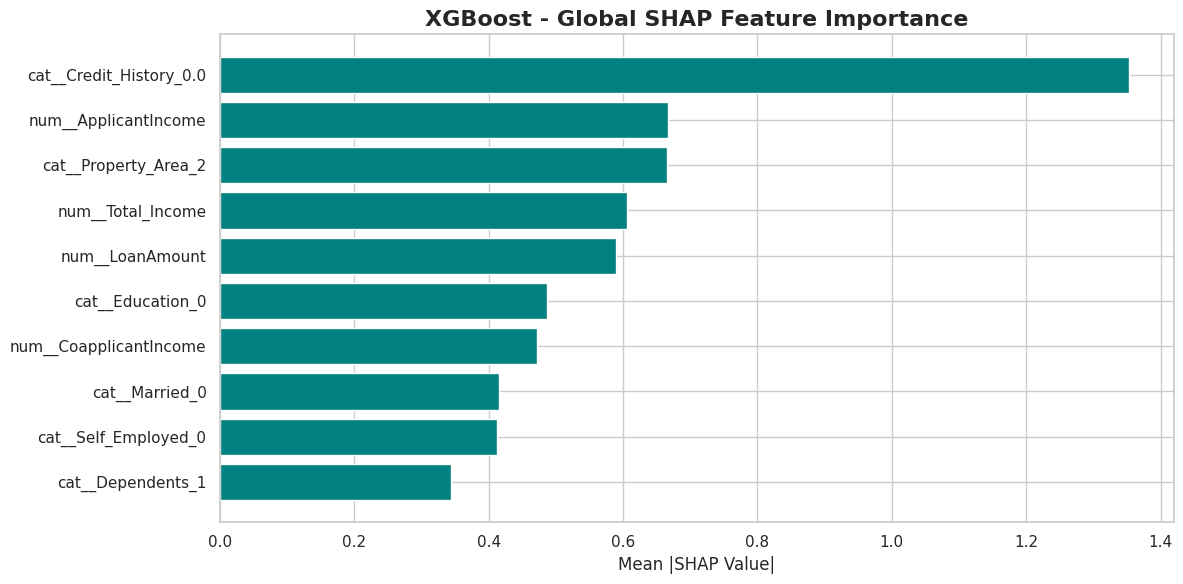

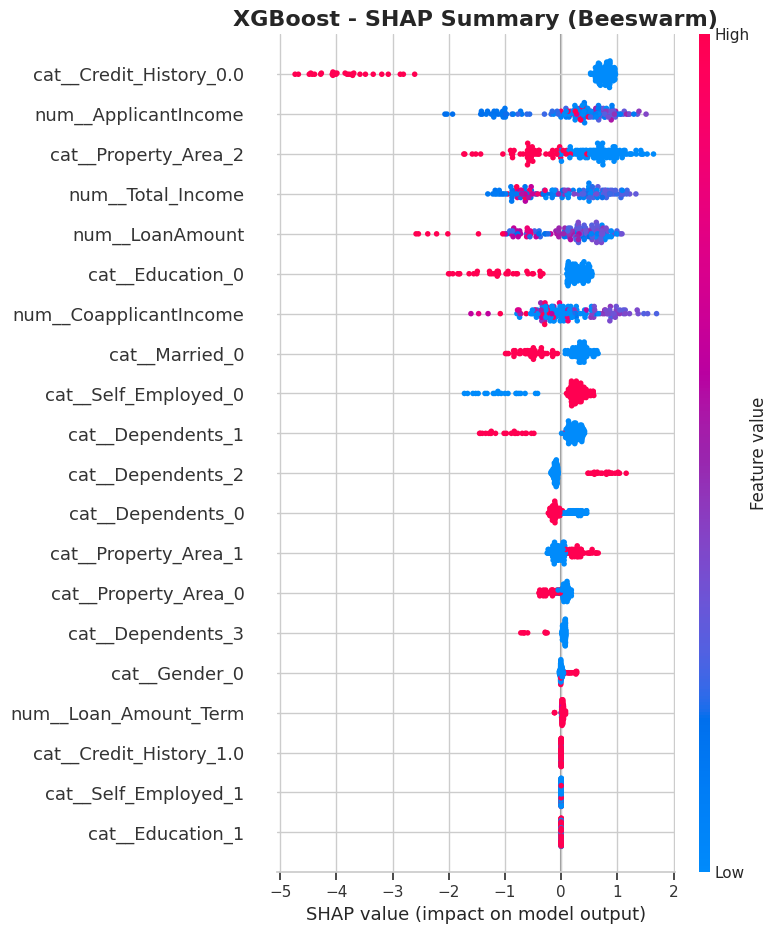

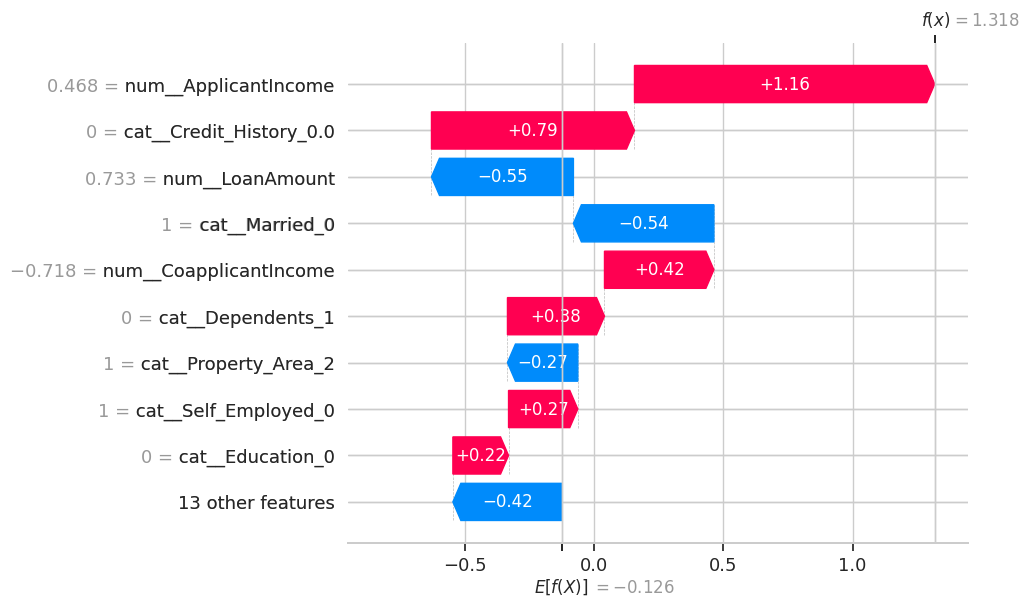

<Figure size 640x480 with 0 Axes>

In [28]:
# ===========================================
# ✅ Final SHAP Explainability (RandomForest + XGBoost)
# ===========================================
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# === Prepare Transformed Data ===
preprocessor = list(model_global_data.values())[0]['best_model'].named_steps['preprocessor']
X_test_transformed = preprocessor.transform(X_test)

# === Get Encoded Feature Names ===
try:
    feature_names = preprocessor.get_feature_names_out()
except:
    feature_names = []
    for name, trans, cols in preprocessor.transformers_:
        if hasattr(trans, 'get_feature_names_out'):
            feature_names.extend(trans.get_feature_names_out(cols))
        else:
            feature_names.extend(cols)

X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)

# --- SHAP for Tree Models ---
for model_name in ["Random Forest", "XGBoost"]:
    if model_name in model_global_data:
        print(f"\n🔍 SHAP Explainability for {model_name}")
        best_model = model_global_data[model_name]['best_model']
        clf = best_model.named_steps['classifier']

        # Create TreeExplainer
        explainer = shap.TreeExplainer(clf)
        shap_values = explainer.shap_values(X_test_df)

        # ✅ For binary classification, use only class 1
        if isinstance(shap_values, list):
            shap_values = shap_values[1]

        # ✅ Convert to numpy & flatten if 3D
        shap_values = np.array(shap_values)
        if shap_values.ndim == 3:
            shap_values = shap_values[:, :, 0]
        elif shap_values.ndim == 1:
            shap_values = shap_values.reshape(-1, 1)

        # ✅ Align feature names to shap_values shape
        n_features = shap_values.shape[1]
        feature_names_matched = feature_names[:n_features]
        X_matched = X_test_df.iloc[:, :n_features]

        # --- 1️⃣ Global Feature Importance ---
        mean_abs_shap = np.mean(np.abs(shap_values), axis=0).flatten()

        shap_importance = pd.DataFrame({
            "Feature": feature_names_matched,
            "Importance": mean_abs_shap
        }).sort_values(by="Importance", ascending=False).head(10)

        plt.figure(figsize=(12, 6))
        plt.barh(shap_importance["Feature"], shap_importance["Importance"], color='teal')
        plt.gca().invert_yaxis()
        plt.title(f"{model_name} - Global SHAP Feature Importance", fontsize=16, weight="bold")
        plt.xlabel("Mean |SHAP Value|")
        plt.tight_layout()
        plt.show()

        # --- 2️⃣ SHAP Beeswarm Summary ---
        plt.figure(figsize=(12, 6))
        shap.summary_plot(shap_values, X_matched, feature_names=feature_names_matched, show=False)
        plt.title(f"{model_name} - SHAP Summary (Beeswarm)", fontsize=16, weight='bold')
        plt.tight_layout()
        plt.show()

        # --- 3️⃣ Local Instance Waterfall ---
        sample_idx = 10
        base_value = (
            explainer.expected_value[1]
            if isinstance(explainer.expected_value, (list, np.ndarray))
            else explainer.expected_value
        )

        explanation = shap.Explanation(
            values=shap_values[sample_idx],
            base_values=base_value,
            data=X_matched.iloc[sample_idx],
            feature_names=feature_names_matched,
        )

        plt.figure(figsize=(10, 4))
        shap.waterfall_plot(explanation)
        plt.tight_layout()
        plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=bbcb2677031761e1637c45d9c5c71487b8a92c6ec4117045c31bf729d19e0c8a
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime

🔍 LIME Explainability for Logistic Regression


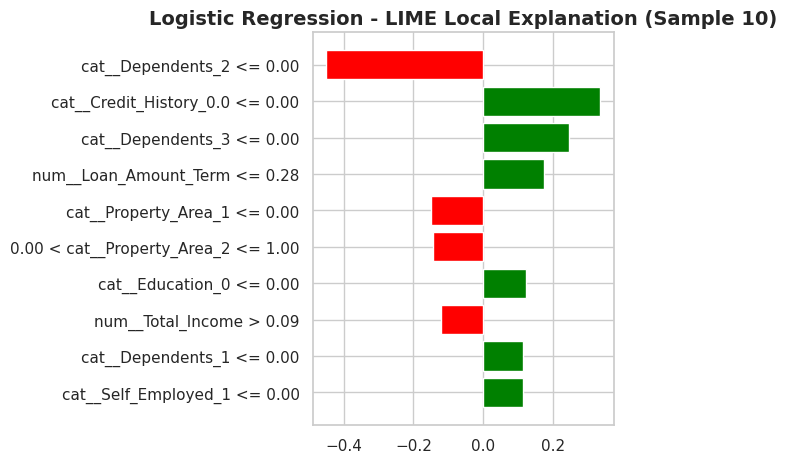

Computing Global LIME Feature Importance (this may take a minute)...


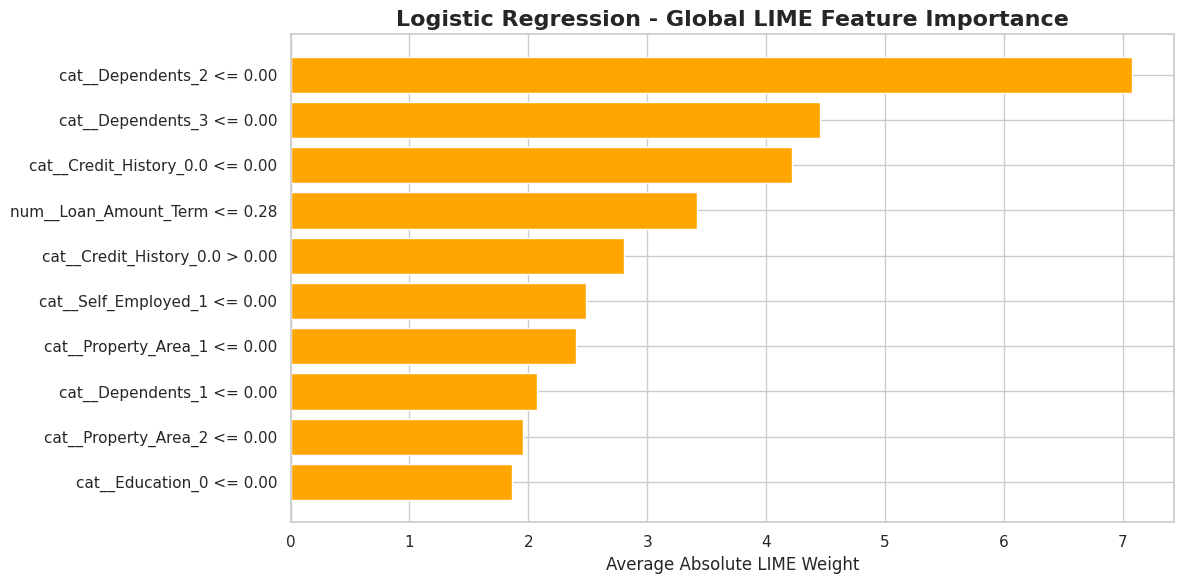


🔍 LIME Explainability for SVM


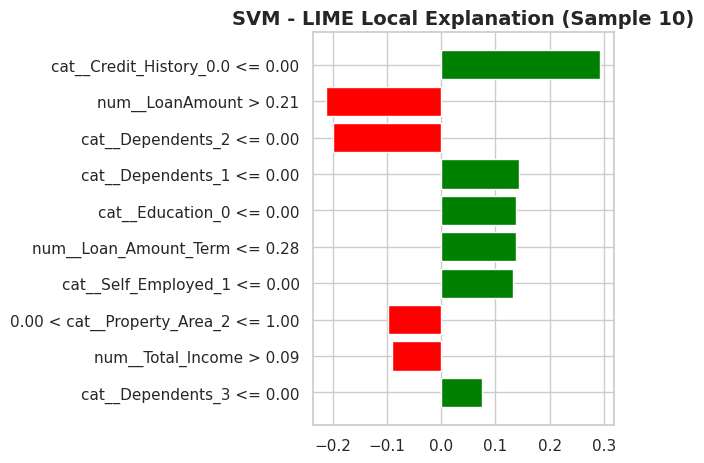

Computing Global LIME Feature Importance (this may take a minute)...


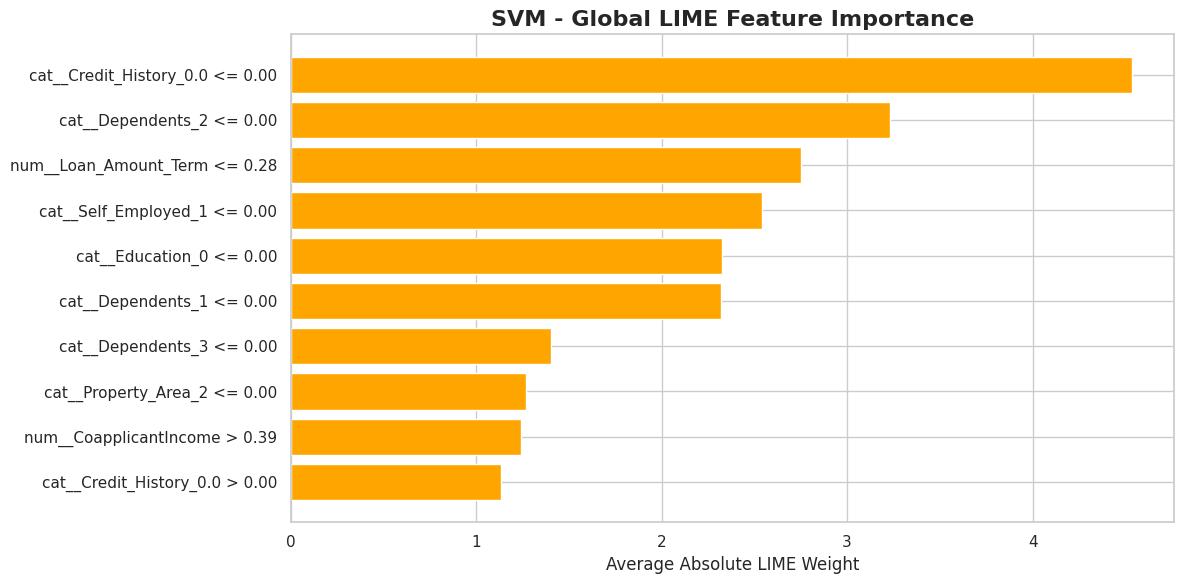

In [31]:
# ===========================================
# ✅ Final LIME Explainability (Logistic Regression + SVM)
# ===========================================

# Install LIME if not already installed
!pip install lime

import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# === Preprocess Test Data for Explainability ===
preprocessor = list(model_global_data.values())[0]['best_model'].named_steps['preprocessor']
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

try:
    feature_names = preprocessor.get_feature_names_out()
except:
    feature_names = []
    for name, trans, cols in preprocessor.transformers_:
        if hasattr(trans, 'get_feature_names_out'):
            feature_names.extend(trans.get_feature_names_out(cols))
        else:
            feature_names.extend(cols)

# === Initialize Global Explainer ===
explainer = LimeTabularExplainer(
    training_data=np.array(X_train_transformed),
    feature_names=feature_names,
    class_names=['Not Approved', 'Approved'],
    mode='classification'
)

# --- Loop through the 2 linear models (LogReg, SVM) ---
for model_name in ["Logistic Regression", "SVM"]:
    if model_name in model_global_data:
        print(f"\n🔍 LIME Explainability for {model_name}")

        best_model = model_global_data[model_name]['best_model']
        classifier = best_model.named_steps['classifier']

        # ✅ Preprocessor ensures encoding consistency
        predict_fn = lambda x: classifier.predict_proba(x)

        # === 1️⃣ Local Explanation (Single Instance) ===
        sample_idx = 10  # You can change this to any instance
        instance = preprocessor.transform(X_test.iloc[[sample_idx]])

        exp = explainer.explain_instance(
            data_row=instance[0],
            predict_fn=predict_fn
        )

        fig = exp.as_pyplot_figure()
        plt.title(f"{model_name} - LIME Local Explanation (Sample {sample_idx})", fontsize=14, weight='bold')
        plt.tight_layout()
        plt.show()

        # === 2️⃣ Global Explanation (Average Feature Importance) ===
        print("Computing Global LIME Feature Importance (this may take a minute)...")

        global_importance = {}
        sample_indices = np.random.choice(len(X_test), size=20, replace=False)  # 20 random test samples

        for idx in sample_indices:
            instance = preprocessor.transform(X_test.iloc[[idx]])
            exp = explainer.explain_instance(
                data_row=instance[0],
                predict_fn=predict_fn
            )
            for feat, weight in exp.as_list():
                global_importance[feat] = global_importance.get(feat, 0) + abs(weight)

        # Convert to DataFrame
        global_importance_df = (
            pd.DataFrame(global_importance.items(), columns=["Feature", "Importance"])
            .sort_values(by="Importance", ascending=False)
            .head(10)
        )

        # Plot Global LIME Importance
        plt.figure(figsize=(12, 6))
        plt.barh(global_importance_df["Feature"], global_importance_df["Importance"], color="orange")
        plt.gca().invert_yaxis()
        plt.title(f"{model_name} - Global LIME Feature Importance", fontsize=16, weight='bold')
        plt.xlabel("Average Absolute LIME Weight")
        plt.tight_layout()
        plt.show()

In [33]:
# ===============================================
# ✅ Fairness Evaluation (DP, DI, SPD, EOD)
# ===============================================

sensitive_attributes = ['Gender', 'Married', 'Education', 'Property_Area']

# Prepare test DataFrame
df_test_base = X_test.copy()
df_test_base['Loan_Status'] = y_test.values

# -----------------------------------
# 🔹 Fairness Functions
# -----------------------------------

def demographic_parity_pred(df, sensitive_attr):
    return df.groupby(sensitive_attr)['y_pred'].mean()

def disparate_impact_pred(df, sensitive_attr):
    rates = demographic_parity_pred(df, sensitive_attr)
    return rates.min() / rates.max() if rates.max() != 0 else np.nan

def statistical_parity_difference_pred(df, sensitive_attr):
    rates = demographic_parity_pred(df, sensitive_attr)
    return rates.min() - rates.max()

def equal_opportunity_difference(df, sensitive_attr):
    """
    Equal Opportunity Difference (EOD):
    Difference in True Positive Rate (TPR) between groups.
    """
    tpr_dict = {}

    for group in df[sensitive_attr].unique():
        subset = df[df[sensitive_attr] == group]
        tp = ((subset['Loan_Status'] == 1) & (subset['y_pred'] == 1)).sum()
        fn = ((subset['Loan_Status'] == 1) & (subset['y_pred'] == 0)).sum()
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        tpr_dict[group] = tpr

    return min(tpr_dict.values()) - max(tpr_dict.values())

# -----------------------------------
# 🔹 Main Evaluation Loop
# -----------------------------------

fairness_metrics = {}

for model_name, data in model_global_data.items():

    print(f"\n===== Fairness Metrics for {model_name} =====\n")

    df_test = df_test_base.copy()
    df_test['y_pred'] = data['test_y_pred']

    model_results = []

    for attr in sensitive_attributes:

        dp = demographic_parity_pred(df_test, attr)
        di = disparate_impact_pred(df_test, attr)
        spd = statistical_parity_difference_pred(df_test, attr)
        eod = equal_opportunity_difference(df_test, attr)

        # ----- Print -----
        print(f"=== Sensitive Attribute: {attr} ===")
        print("Demographic Parity (Approval Rate):")
        print(dp)
        print(f"Disparate Impact (DI): {di:.3f}")
        print(f"Statistical Parity Difference (SPD): {spd:.3f}")
        print(f"Equal Opportunity Difference (EOD): {eod:.3f}\n")

        # ----- Store -----
        model_results.append({
            "Sensitive Attribute": attr,
            "DP": dp.to_dict(),
            "Disparate Impact": float(round(di, 3)),
            "Statistical Parity Difference": float(round(spd, 3)),
            "Equal Opportunity Difference": float(round(eod, 3))
        })

    fairness_metrics[model_name] = model_results

# -----------------------------------
# 🔹 Summary Print
# -----------------------------------

print("\n📊 === Stored Fairness Metrics (With EOD) ===\n")

for model, metrics in fairness_metrics.items():
    print(f"\n🔹 {model}")
    for item in metrics:
        print(
            f"  {item['Sensitive Attribute']} | "
            f"DI={item['Disparate Impact']} | "
            f"SPD={item['Statistical Parity Difference']} | "
            f"EOD={item['Equal Opportunity Difference']}"
        )


===== Fairness Metrics for Random Forest =====

=== Sensitive Attribute: Gender ===
Demographic Parity (Approval Rate):
Gender
0    0.692308
1    0.822581
Name: y_pred, dtype: float64
Disparate Impact (DI): 0.842
Statistical Parity Difference (SPD): -0.130
Equal Opportunity Difference (EOD): -0.022

=== Sensitive Attribute: Married ===
Demographic Parity (Approval Rate):
Married
0    0.763636
1    0.821053
Name: y_pred, dtype: float64
Disparate Impact (DI): 0.930
Statistical Parity Difference (SPD): -0.057
Equal Opportunity Difference (EOD): -0.014

=== Sensitive Attribute: Education ===
Demographic Parity (Approval Rate):
Education
0    0.647059
1    0.844828
Name: y_pred, dtype: float64
Disparate Impact (DI): 0.766
Statistical Parity Difference (SPD): -0.198
Equal Opportunity Difference (EOD): -0.033

=== Sensitive Attribute: Property_Area ===
Demographic Parity (Approval Rate):
Property_Area
0    0.826087
1    0.849057
2    0.725490
Name: y_pred, dtype: float64
Disparate Impact (DI

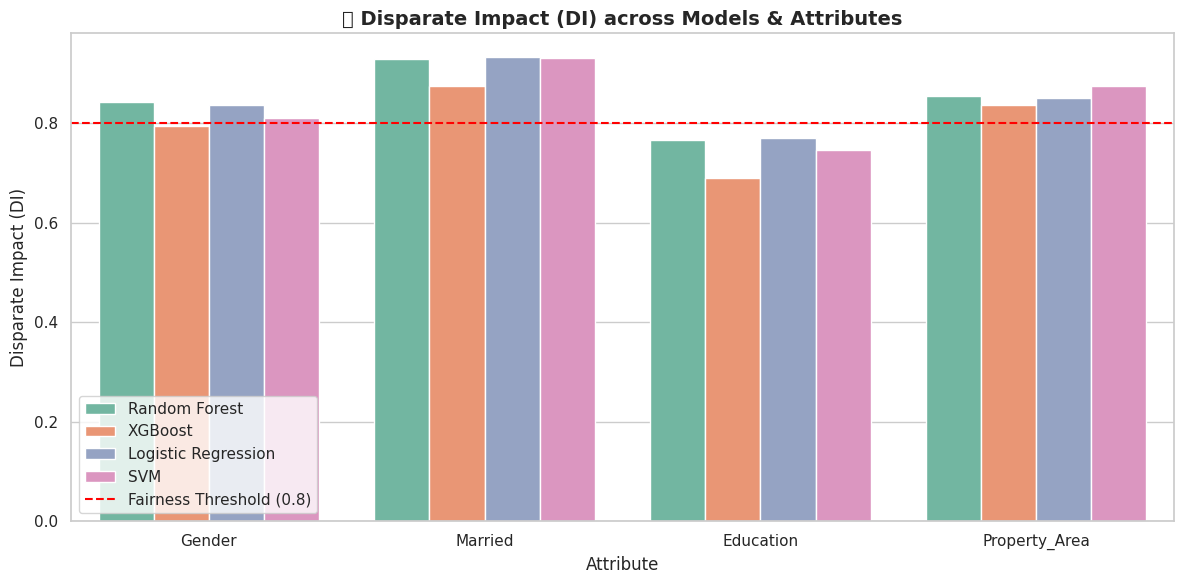

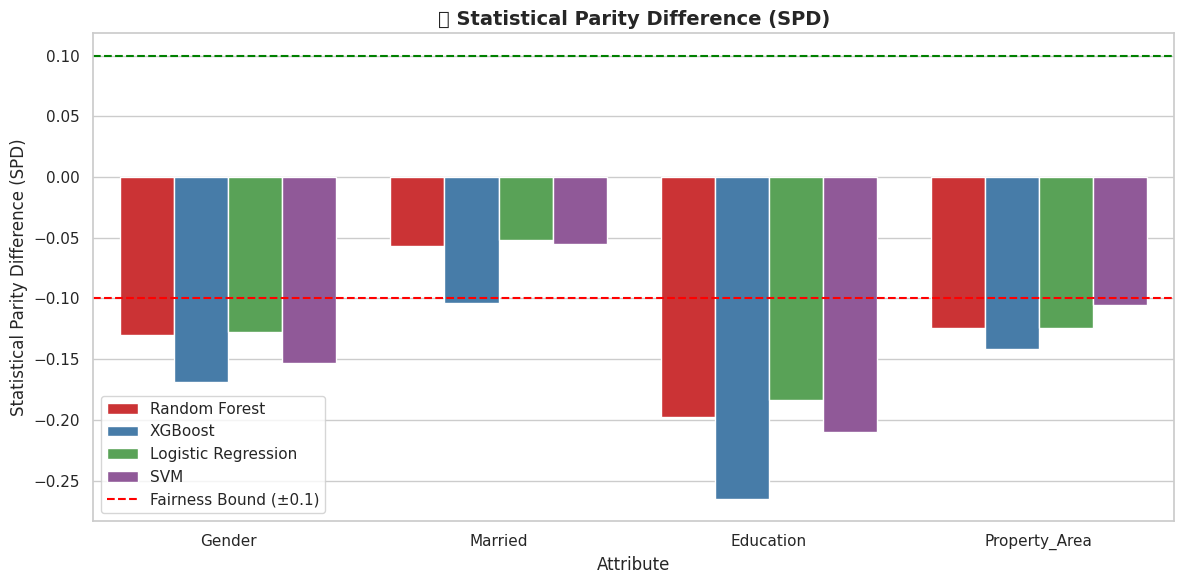

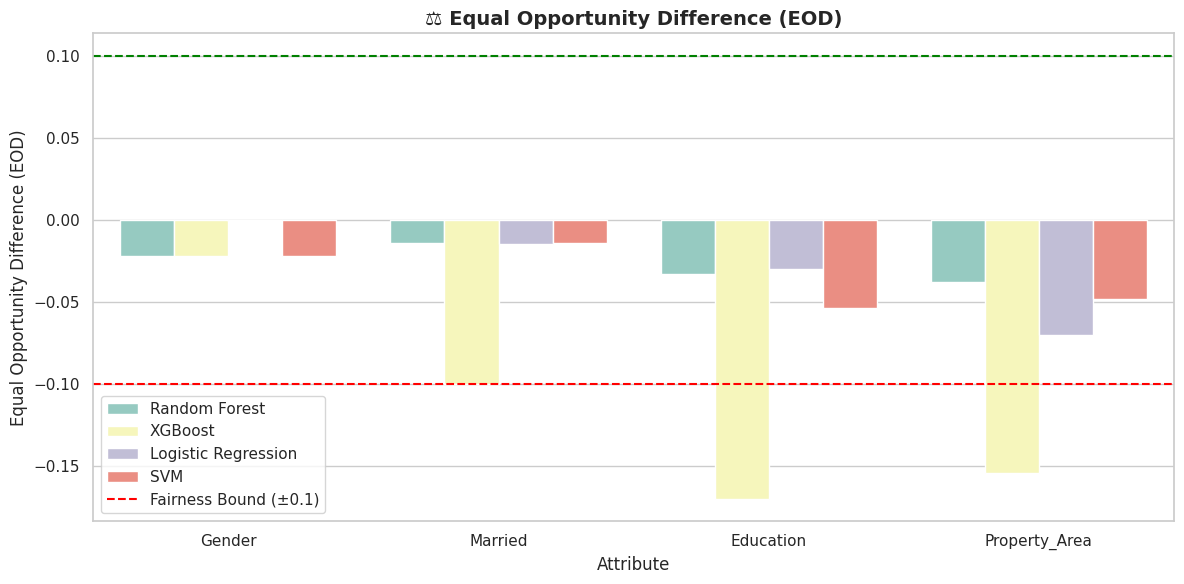

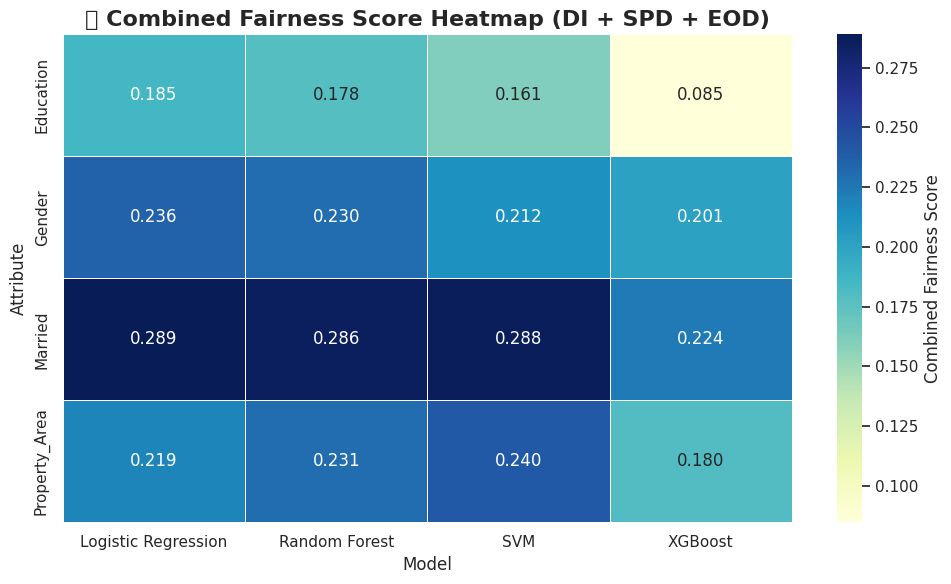

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# ===============================================
# ✅ Convert stored fairness dictionary to DataFrame
# ===============================================

fairness_summary = []

for model_name, attr_list in fairness_metrics.items():  # ⚠️ Use updated fairness_metrics
    for record in attr_list:
        fairness_summary.append([
            model_name,
            record["Sensitive Attribute"],
            record["Disparate Impact"],
            record["Statistical Parity Difference"],
            record["Equal Opportunity Difference"]
        ])

fairness_df = pd.DataFrame(
    fairness_summary,
    columns=["Model", "Attribute", "DI", "SPD", "EOD"]
)

sns.set(style="whitegrid")

# ===============================================
# 📊 1️⃣ Disparate Impact Plot
# ===============================================

plt.figure(figsize=(12,6))
sns.barplot(data=fairness_df, x="Attribute", y="DI", hue="Model", palette="Set2")
plt.axhline(0.8, color="red", linestyle="--", label="Fairness Threshold (0.8)")
plt.title("📊 Disparate Impact (DI) across Models & Attributes", fontsize=14, weight="bold")
plt.ylabel("Disparate Impact (DI)")
plt.legend()
plt.tight_layout()
plt.show()

# ===============================================
# 📉 2️⃣ Statistical Parity Difference Plot
# ===============================================

plt.figure(figsize=(12,6))
sns.barplot(data=fairness_df, x="Attribute", y="SPD", hue="Model", palette="Set1")
plt.axhline(0.1, color="green", linestyle="--")
plt.axhline(-0.1, color="red", linestyle="--", label="Fairness Bound (±0.1)")
plt.title("📉 Statistical Parity Difference (SPD)", fontsize=14, weight="bold")
plt.ylabel("Statistical Parity Difference (SPD)")
plt.legend()
plt.tight_layout()
plt.show()

# ===============================================
# ⚖️ 3️⃣ Equal Opportunity Difference Plot (NEW)
# ===============================================

plt.figure(figsize=(12,6))
sns.barplot(data=fairness_df, x="Attribute", y="EOD", hue="Model", palette="Set3")
plt.axhline(0.1, color="green", linestyle="--")
plt.axhline(-0.1, color="red", linestyle="--", label="Fairness Bound (±0.1)")
plt.title("⚖️ Equal Opportunity Difference (EOD)", fontsize=14, weight="bold")
plt.ylabel("Equal Opportunity Difference (EOD)")
plt.legend()
plt.tight_layout()
plt.show()

# ===============================================
# 🔥 4️⃣ Updated Fairness Score (DI, SPD, EOD combined)
# ===============================================

# Combined fairness score
fairness_df["Fairness_Score"] = (
    fairness_df["DI"]
    - fairness_df["SPD"].abs()
    - fairness_df["EOD"].abs()
) / 3

heatmap_data = fairness_df.pivot(index="Attribute", columns="Model", values="Fairness_Score")

plt.figure(figsize=(10,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "Combined Fairness Score"}
)

plt.title("🔥 Combined Fairness Score Heatmap (DI + SPD + EOD)", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()

In [37]:
# Install aif360 if not already installed
!pip install aif360

from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.postprocessing import RejectOptionClassification
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

sensitive_features = ['Gender', 'Education']
results_fair = {}

# === Global Store for Fairness Metrics After ROC ===
fairness_metrics_afterROC = {}

# Privileged/unprivileged groups definition
privileged_groups_dict = {
    'Gender': [{'Gender': 1}],       # Male
    'Education': [{'Education': 1}]  # Graduate
}

unprivileged_groups_dict = {
    'Gender': [{'Gender': 0}],       # Female
    'Education': [{'Education': 0}]  # Not Graduate
}

for model_name in model_global_data.keys():
    print(f"\n===== {model_name} After AIF360 Fairness Adjustment =====")

    best_model = model_global_data[model_name]['best_model']

    # Predicted probabilities
    y_prob = best_model.predict_proba(X_test)[:,1]
    y_prob = np.round(y_prob, 5)

    # Create BinaryLabelDataset for AIF360
    X_test_copy = X_test.copy()
    X_test_copy['Loan_Status'] = y_test.values

    dataset = BinaryLabelDataset(
        df=X_test_copy,
        label_names=['Loan_Status'],
        protected_attribute_names=sensitive_features
    )

    # Original scores
    dataset.scores = y_prob.reshape(-1,1)

    # ============================
    # 🔹 Sequential ROC Mitigation
    # ============================

    # --- Gender ROC ---
    roc_gender = RejectOptionClassification(
        unprivileged_groups=unprivileged_groups_dict['Gender'],
        privileged_groups=privileged_groups_dict['Gender'],
        low_class_thresh=0.01,
        high_class_thresh=0.99,
        num_class_thresh=100,
        num_ROC_margin=50,
        metric_name="Statistical parity difference",
        metric_ub=0.02,
        metric_lb=-0.02
    )

    roc_gender = roc_gender.fit(dataset, dataset)
    dataset_gender_fair = roc_gender.predict(dataset)

    # Update dataset labels
    dataset.labels = dataset_gender_fair.labels

    # --- Education ROC ---
    roc_edu = RejectOptionClassification(
        unprivileged_groups=unprivileged_groups_dict['Education'],
        privileged_groups=privileged_groups_dict['Education'],
        low_class_thresh=0.01,
        high_class_thresh=0.99,
        num_class_thresh=100,
        num_ROC_margin=50,
        metric_name="Statistical parity difference",
        metric_ub=0.05,
        metric_lb=-0.05
    )

    roc_edu = roc_edu.fit(dataset, dataset)
    dataset_final = roc_edu.predict(dataset)

    y_pred_fair = dataset_final.labels.flatten()

    # ============================
    # 🔹 Classification Report
    # ============================

    print(classification_report(y_test, y_pred_fair, digits=4))

    results_fair[model_name] = y_pred_fair

    # ============================
    # 🔹 Fairness Metrics (DI, SPD, EOD)
    # ============================

    df_fair = X_test.copy()
    df_fair['Loan_Status'] = y_test.values
    df_fair['y_pred'] = y_pred_fair

    model_metrics = []

    for attr in sensitive_features:

        # --- Demographic Parity ---
        rates = df_fair.groupby(attr)['y_pred'].mean()
        di = rates.min() / rates.max() if rates.max() != 0 else np.nan
        spd = rates.max() - rates.min()

        # --- Equal Opportunity Difference (EOD) ---
        tpr_dict = {}

        for group in df_fair[attr].unique():
            group_df = df_fair[df_fair[attr] == group]
            actual_positive = group_df[group_df['Loan_Status'] == 1]

            if len(actual_positive) == 0:
                tpr = 0
            else:
                tpr = (actual_positive['y_pred'] == 1).mean()

            tpr_dict[group] = tpr

        eod = max(tpr_dict.values()) - min(tpr_dict.values())

        # --- Print ---
        print(f"\n=== Sensitive Attribute: {attr} ===")
        print("Demographic Parity (Predicted Approval Rate):")
        print(rates)
        print(f"Disparate Impact (DI): {di:.3f}")
        print(f"Statistical Parity Difference (SPD): {spd:.3f}")
        print(f"Equal Opportunity Difference (EOD): {eod:.3f}")

        # --- Store ---
        model_metrics.append({
            "Sensitive Attribute": attr,
            "DP": rates.to_dict(),
            "Disparate Impact": float(round(di, 3)),
            "Statistical Parity Difference": float(round(spd, 3)),
            "Equal Opportunity Difference": float(round(eod, 3))
        })

    fairness_metrics_afterROC[model_name] = model_metrics


# ============================
# 🔹 Summary Print
# ============================

print("\n📊 === Fairness Metrics Stored Globally (After ROC with EOD) ===\n")
import pprint
pprint.pprint(fairness_metrics_afterROC)


===== Random Forest After AIF360 Fairness Adjustment =====
              precision    recall  f1-score   support

           0     0.7209    0.6739    0.6966        46
           1     0.8598    0.8846    0.8720       104

    accuracy                         0.8200       150
   macro avg     0.7904    0.7793    0.7843       150
weighted avg     0.8172    0.8200    0.8182       150


=== Sensitive Attribute: Gender ===
Demographic Parity (Predicted Approval Rate):
Gender
0    0.615385
1    0.733871
Name: y_pred, dtype: float64
Disparate Impact (DI): 0.839
Statistical Parity Difference (SPD): 0.118
Equal Opportunity Difference (EOD): 0.057

=== Sensitive Attribute: Education ===
Demographic Parity (Predicted Approval Rate):
Education
0    0.676471
1    0.724138
Name: y_pred, dtype: float64
Disparate Impact (DI): 0.934
Statistical Parity Difference (SPD): 0.048
Equal Opportunity Difference (EOD): 0.089

===== XGBoost After AIF360 Fairness Adjustment =====
              precision    reca


 Disparate Impact Evolution Summary (All Models)



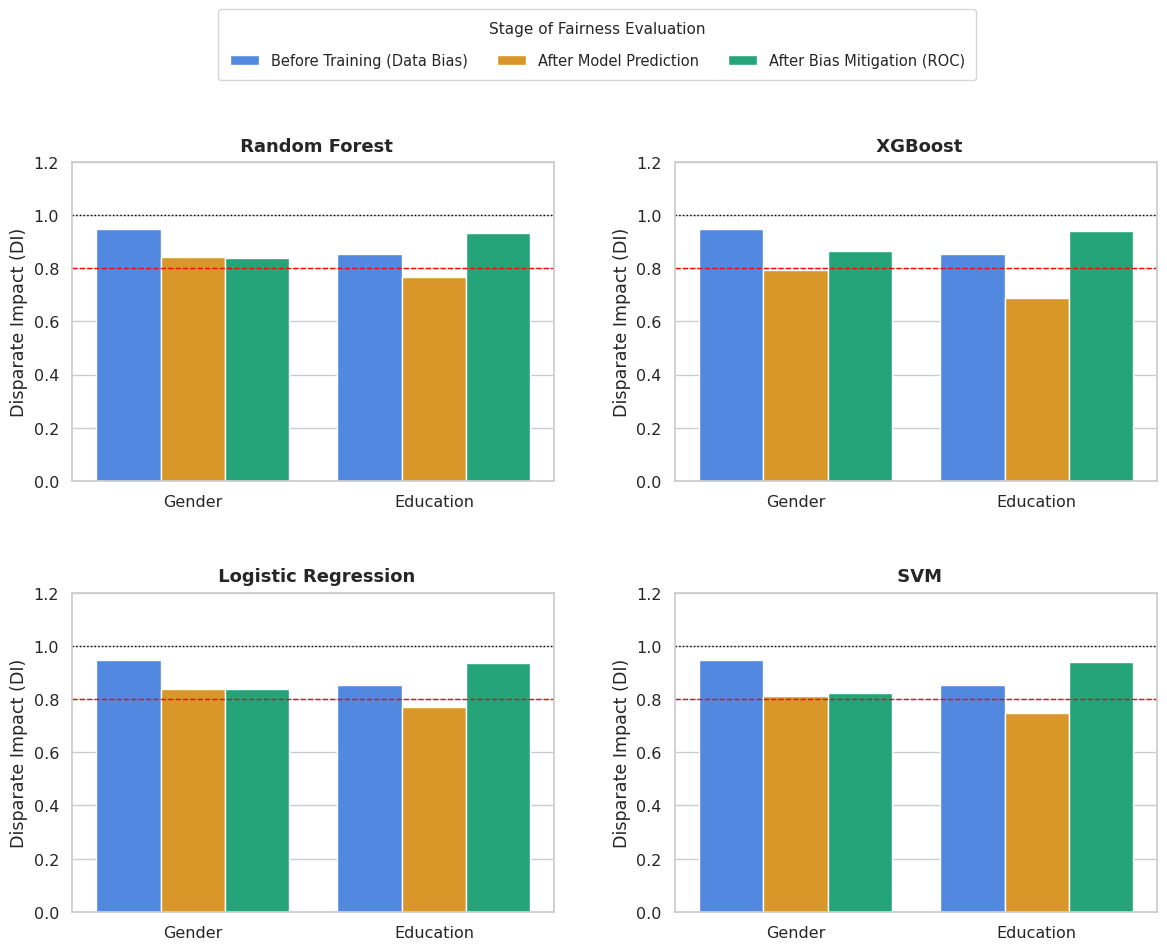

Stage                          After Bias Mitigation (ROC)  After Model Prediction  Before Training (Data Bias)
Model               Attribute                                                                                  
Logistic Regression Education                        0.934                   0.770                        0.853
                    Gender                           0.839                   0.836                        0.946
Random Forest       Education                        0.934                   0.766                        0.853
                    Gender                           0.839                   0.842                        0.946
SVM                 Education                        0.938                   0.746                        0.853
                    Gender                           0.822                   0.811                        0.946
XGBoost             Education                        0.941                   0.689                      

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# === Sensitive attributes to evaluate ===
sensitive_attributes = ['Gender', 'Education']

# === Prepare Comparative Data for ALL models ===
evolution_records = []

for model_name in fairness_metrics.keys(): # Corrected: using fairness_metrics instead of fairness_metrics_beforeROC
    for attr in sensitive_attributes:
        # 🔹 Before Training (raw data fairness)
        dp_before = demographic_parity(df, attr, 'Loan_Status')
        di_before = dp_before.min() / dp_before.max() if dp_before.max() != 0 else np.nan

        # 🔹 After Model (prediction fairness)
        for item in fairness_metrics[model_name]: # Corrected: using fairness_metrics instead of fairness_metrics_beforeROC
            if item["Sensitive Attribute"] == attr:
                di_after_model = item["Disparate Impact"]
                break

        # After ROC (post-bias mitigation)
        for item in fairness_metrics_afterROC[model_name]:
            if item["Sensitive Attribute"] == attr:
                di_after_roc = item["Disparate Impact"]
                break

        # === Store all 3 stages with clear, readable labels ===
        evolution_records.extend([
            {"Model": model_name, "Attribute": attr, "Stage": "Before Training (Data Bias)", "DI": round(di_before, 3)},
            {"Model": model_name, "Attribute": attr, "Stage": "After Model Prediction", "DI": round(di_after_model, 3)},
            {"Model": model_name, "Attribute": attr, "Stage": "After Bias Mitigation (ROC)", "DI": round(di_after_roc, 3)},
        ])

print("\n Disparate Impact Evolution Summary (All Models)\n")

# === Convert to DataFrame ===
evolution_df = pd.DataFrame(evolution_records)

# === Global Style ===
sns.set(style="whitegrid", font_scale=1.05)
palette = ["#3b82f6", "#f59e0b", "#10b981"]  # blue, amber, green (modern palette)

# === Create a 2×2 Grid for up to 4 Models ===
unique_models = evolution_df["Model"].unique()
n_models = len(unique_models)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# === Plot each model ===
for i, model in enumerate(unique_models):
    ax = axes[i]
    subset = evolution_df[evolution_df["Model"] == model]

    sns.barplot(
        data=subset,
        x="Attribute",
        y="DI",
        hue="Stage",
        palette=palette,
        ax=ax
    )

    # reference lines
    ax.axhline(0.8, color="red", linestyle="--", linewidth=1)
    ax.axhline(1.0, color="black", linestyle=":", linewidth=1)
    ax.set_ylim(0, 1.2)
    ax.set_title(f" {model}", fontsize=13, weight="bold", pad=8)
    ax.set_xlabel("")
    ax.set_ylabel("Disparate Impact (DI)")
    ax.legend_.remove()

# === Hide empty subplot (if fewer than 4 models) ===
if n_models < 4:
    for j in range(n_models, 4):
        fig.delaxes(axes[j])

# === Add Common Legend (clean, centered layout) ===
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title="Stage of Fairness Evaluation",
    loc="upper center",
    bbox_to_anchor=(0.5, 1.02),
    ncol=3,
    fontsize=10.5,
    title_fontsize=11,
    labelspacing=1.2,
    borderpad=0.8
)

# === Adjust Layout ===
plt.subplots_adjust(top=0.86, hspace=0.35, wspace=0.25)
plt.show()

# === Print Numeric Summary (Readable) ===

summary_table = evolution_df.pivot_table(
    index=["Model", "Attribute"],
    columns="Stage",
    values="DI"
).sort_index()
print(summary_table.to_string(float_format="%.3f"))

print("\n📘 Explanation:")
print(" • Before Training (Data Bias): Fairness in the original dataset.")
print(" • After Model Prediction: Fairness in model’s predictions before any correction.")
print(" • After Bias Mitigation (ROC): Fairness after applying AIF360 bias correction.")
print("\n✅ Fairness Rule of Thumb:")
print(" • DI = 1.0 → Perfect fairness")
print(" • DI ≥ 0.8 → Acceptable fairness (meets 80% rule)")
print(" • DI < 0.8 → Potential bias detected")


📉 Statistical Parity Difference (SPD) Evolution Summary (All Models)



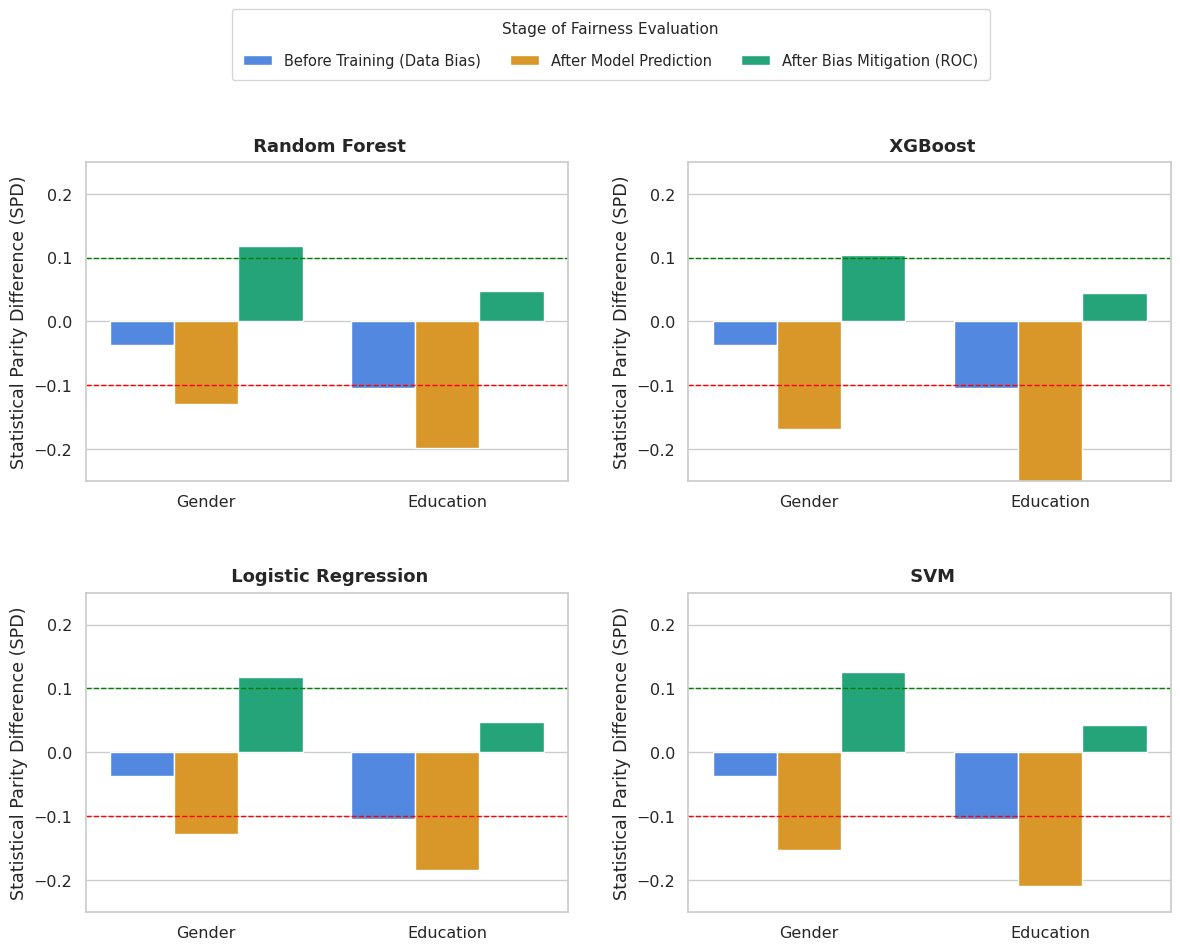

Stage                          After Bias Mitigation (ROC)  After Model Prediction  Before Training (Data Bias)
Model               Attribute                                                                                  
Logistic Regression Education                        0.048                  -0.184                       -0.105
                    Gender                           0.118                  -0.128                       -0.037
Random Forest       Education                        0.048                  -0.198                       -0.105
                    Gender                           0.118                  -0.130                       -0.037
SVM                 Education                        0.043                  -0.210                       -0.105
                    Gender                           0.125                  -0.153                       -0.037
XGBoost             Education                        0.044                  -0.265                      

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# === Sensitive attributes to evaluate ===
sensitive_attributes = ['Gender', 'Education']

# === Prepare Comparative Data for ALL models ===
spd_records = []

for model_name in fairness_metrics.keys(): # Corrected: using fairness_metrics instead of fairness_metrics_beforeROC
    for attr in sensitive_attributes:
        # --- BEFORE TRAINING ---
        dp_before = demographic_parity(df, attr, 'Loan_Status')
        spd_before = dp_before.min() - dp_before.max()

        # --- AFTER MODEL ---
        for item in fairness_metrics[model_name]: # Corrected: using fairness_metrics instead of fairness_metrics_beforeROC
            if item["Sensitive Attribute"] == attr:
                spd_after_model = item["Statistical Parity Difference"]
                break

        # --- AFTER ROC ---
        for item in fairness_metrics_afterROC[model_name]:
            if item["Sensitive Attribute"] == attr:
                spd_after_roc = item["Statistical Parity Difference"]
                break

        # === Store all 3 stages with clear labels ===
        spd_records.extend([
            {"Model": model_name, "Attribute": attr, "Stage": "Before Training (Data Bias)", "SPD": round(spd_before, 3)},
            {"Model": model_name, "Attribute": attr, "Stage": "After Model Prediction", "SPD": round(spd_after_model, 3)},
            {"Model": model_name, "Attribute": attr, "Stage": "After Bias Mitigation (ROC)", "SPD": round(spd_after_roc, 3)},
        ])

print("\033[1m\033[96m\n📉 Statistical Parity Difference (SPD) Evolution Summary (All Models)\033[0m\n")

# === Convert to DataFrame ===
spd_df = pd.DataFrame(spd_records)

# === Global Style ===
sns.set(style="whitegrid", font_scale=1.05)
palette = ["#3b82f6", "#f59e0b", "#10b981"]  # same modern palette as DI

# === Create a 2×2 Grid for up to 4 Models ===
unique_models = spd_df["Model"].unique()
n_models = len(unique_models)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# === Plot each model ===
for i, model in enumerate(unique_models):
    ax = axes[i]
    subset = spd_df[spd_df["Model"] == model]

    sns.barplot(
        data=subset,
        x="Attribute",
        y="SPD",
        hue="Stage",
        palette=palette,
        ax=ax
    )

    # reference lines
    ax.axhline(0.1, color="green", linestyle="--", linewidth=1)
    ax.axhline(-0.1, color="red", linestyle="--", linewidth=1)
    ax.set_ylim(-0.25, 0.25)
    ax.set_title(f" {model}", fontsize=13, weight="bold", pad=8)
    ax.set_xlabel("")
    ax.set_ylabel("Statistical Parity Difference (SPD)")
    ax.legend_.remove()

# === Hide empty subplot (if fewer than 4 models) ===
if n_models < 4:
    for j in range(n_models, 4):
        fig.delaxes(axes[j])

# === Add Common Legend ===
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title="Stage of Fairness Evaluation",
    loc="upper center",
    bbox_to_anchor=(0.5, 1.02),
    ncol=3,
    fontsize=10.5,
    title_fontsize=11,
    labelspacing=1.2,
    borderpad=0.8
)

# === Adjust Layout ===
plt.subplots_adjust(top=0.86, hspace=0.35, wspace=0.25)
plt.show()

# === Print Numeric Summary (Readable) ===
summary_spd = spd_df.pivot_table(
    index=["Model", "Attribute"],
    columns="Stage",
    values="SPD"
).sort_index()
print(summary_spd.to_string(float_format="%.3f"))

print("\n📘 Explanation:")
print(" • Before Training (Data Bias): SPD in the original dataset.")
print(" • After Model Prediction: SPD in model predictions before bias mitigation.")
print(" • After Bias Mitigation (ROC): SPD after applying AIF360 postprocessing.")
print("\n✅ Fairness Rule of Thumb:")
print(" • SPD ≈ 0.0 → Perfect fairness")
print(" • -0.1 ≤ SPD ≤ 0.1 → Acceptable fairness range")
print(" • |SPD| > 0.1 → Possible bias detected")


📉 Equal Opportunity Difference (EOD) Evolution Summary



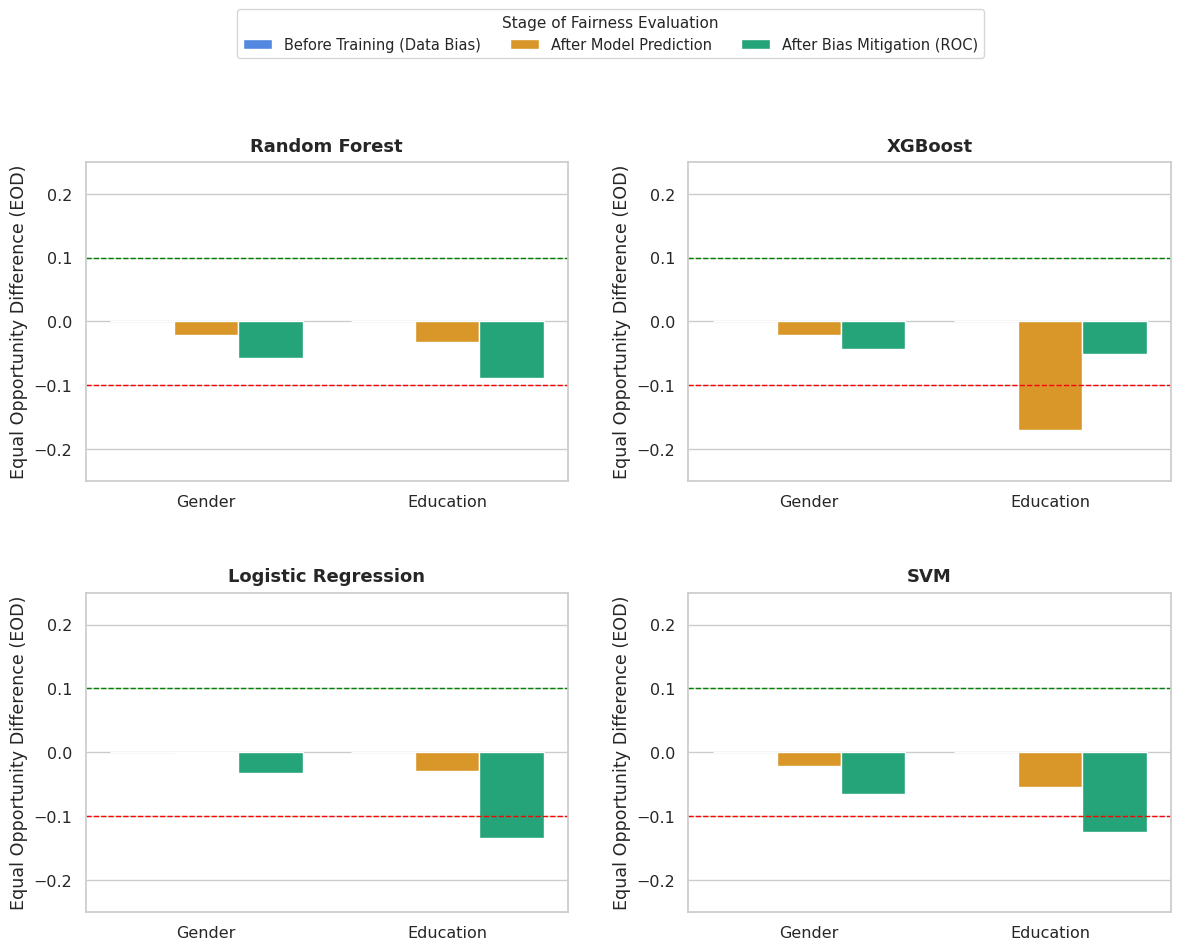

Stage                          After Bias Mitigation (ROC)  After Model Prediction  Before Training (Data Bias)
Model               Attribute                                                                                  
Logistic Regression Education                       -0.134                  -0.030                        0.000
                    Gender                          -0.032                  -0.001                        0.000
Random Forest       Education                       -0.089                  -0.033                        0.000
                    Gender                          -0.057                  -0.022                        0.000
SVM                 Education                       -0.125                  -0.054                        0.000
                    Gender                          -0.065                  -0.022                        0.000
XGBoost             Education                       -0.051                  -0.170                      

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# =====================================================
# 1️⃣ Equal Opportunity Difference Function
# =====================================================

def equal_opportunity_difference(df, sensitive_attr):
    tpr_dict = {}

    for group in df[sensitive_attr].unique():
        subset = df[df[sensitive_attr] == group]

        tp = ((subset['Loan_Status'] == 1) & (subset['y_pred'] == 1)).sum()
        fn = ((subset['Loan_Status'] == 1) & (subset['y_pred'] == 0)).sum()

        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        tpr_dict[group] = tpr

    return min(tpr_dict.values()) - max(tpr_dict.values())


# =====================================================
# 2️⃣ Prepare EOD Evolution Records
# =====================================================

sensitive_attributes = ['Gender', 'Education']
eod_records = []

for model_name in model_global_data.keys():
    for attr in sensitive_attributes:

        # 🔹 BEFORE TRAINING (Raw Data)
        df_before = df.copy()
        df_before['y_pred'] = df_before['Loan_Status']
        eod_before = equal_opportunity_difference(df_before, attr)

        # 🔹 AFTER MODEL
        df_model = X_test.copy()
        df_model['Loan_Status'] = y_test.values
        df_model['y_pred'] = model_global_data[model_name]['test_y_pred']
        eod_after_model = equal_opportunity_difference(df_model, attr)

        # 🔹 AFTER ROC
        df_roc = X_test.copy()
        df_roc['Loan_Status'] = y_test.values
        df_roc['y_pred'] = results_fair[model_name]
        eod_after_roc = equal_opportunity_difference(df_roc, attr)

        eod_records.extend([
            {"Model": model_name, "Attribute": attr,
             "Stage": "Before Training (Data Bias)",
             "EOD": round(eod_before, 3)},

            {"Model": model_name, "Attribute": attr,
             "Stage": "After Model Prediction",
             "EOD": round(eod_after_model, 3)},

            {"Model": model_name, "Attribute": attr,
             "Stage": "After Bias Mitigation (ROC)",
             "EOD": round(eod_after_roc, 3)},
        ])

print("\n📉 Equal Opportunity Difference (EOD) Evolution Summary\n")

eod_df = pd.DataFrame(eod_records)

# =====================================================
# 3️⃣ Visualization (2×2 Grid – Same Style as SPD)
# =====================================================

sns.set(style="whitegrid", font_scale=1.05)
palette = ["#3b82f6", "#f59e0b", "#10b981"]

unique_models = eod_df["Model"].unique()
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, model in enumerate(unique_models):

    ax = axes[i]
    subset = eod_df[eod_df["Model"] == model]

    sns.barplot(
        data=subset,
        x="Attribute",
        y="EOD",
        hue="Stage",
        palette=palette,
        ax=ax
    )

    # Fairness reference lines
    ax.axhline(0.1, color="green", linestyle="--", linewidth=1)
    ax.axhline(-0.1, color="red", linestyle="--", linewidth=1)

    ax.set_ylim(-0.25, 0.25)
    ax.set_title(f"{model}", fontsize=13, weight="bold", pad=8)
    ax.set_xlabel("")
    ax.set_ylabel("Equal Opportunity Difference (EOD)")
    ax.legend_.remove()

# Hide extra subplot if needed
if len(unique_models) < 4:
    for j in range(len(unique_models), 4):
        fig.delaxes(axes[j])

# Common Legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title="Stage of Fairness Evaluation",
    loc="upper center",
    bbox_to_anchor=(0.5, 1.02),
    ncol=3,
    fontsize=10.5,
    title_fontsize=11
)

plt.subplots_adjust(top=0.86, hspace=0.35, wspace=0.25)
plt.show()


# =====================================================
# 4️⃣ Numeric Summary Table
# =====================================================

summary_eod = eod_df.pivot_table(
    index=["Model", "Attribute"],
    columns="Stage",
    values="EOD"
).sort_index()

print(summary_eod.to_string(float_format="%.3f"))

print("\n📘 Explanation:")
print(" • EOD measures difference in True Positive Rate (TPR) across groups.")
print(" • EOD ≈ 0 → Fair")
print(" • -0.1 ≤ EOD ≤ 0.1 → Acceptable fairness range")
print(" • |EOD| > 0.1 → Possible bias detected")